In [19]:
!pwd

/content/datalab


In [20]:
%bash
pip freeze

absl-py==0.7.1
alembic==0.8.10
apache-airflow==1.9.0
asn1crypto==0.24.0
astor==0.8.0
avro==1.9.0
backports-abc==0.5
backports.functools-lru-cache==1.5
backports.shutil-get-terminal-size==1.0.0
backports.ssl-match-hostname==3.7.0.1
backports.weakref==1.0.post1
beautifulsoup4==4.7.1
bleach==2.1.2
blinker==1.4
bokeh==1.2.0
brewer2mpl==1.4.1
bs4==0.0.1
cachetools==2.1.0
certifi==2019.3.9
cffi==1.12.3
chardet==3.0.4
Click==7.0
cloudpickle==1.1.1
configparser==3.5.3
crcmod==1.7
croniter==0.3.30
cryptography==2.3.1
cycler==0.10.0
cytoolz==0.9.0.1
dask==0.17.1
datalab==1.1.3
decorator==4.4.0
defusedxml==0.6.0
dill==0.2.6
distributed==1.21.8
docutils==0.14
entrypoints==0.3
enum34==1.1.6
fastcache==1.1.0
Flask==0.11.1
Flask-Admin==1.4.1
Flask-Cache==0.13.1
Flask-Login==0.2.11
flask-swagger==0.2.13
Flask-WTF==0.14
funcsigs==1.0.0
functools32==3.2.3.post2
future==0.16.0
futures==3.2.0
gast==0.2.2
ggplot==0.6.8
gitdb2==2.0.5
GitPython==2.1.11
google-api-core==0.1.4
google-api-python-client==1.6.2
g

In [21]:
%bash
pip install google-cloud

In [22]:
%%bash
pip install --user git+https://github.com/matplotlib/basemap.git

  Cloning https://github.com/matplotlib/basemap.git to /tmp/pip-req-build-Su1yX7
    Complete output from command python setup.py egg_info:
    checking for GEOS lib in /content ....
    checking for GEOS lib in /content/local ....
    checking for GEOS lib in /usr ....
    checking for GEOS lib in /usr/local ....
    checking for GEOS lib in /sw ....
    checking for GEOS lib in /opt ....
    checking for GEOS lib in /opt/local ....
    
    Can't find geos library in standard locations ('/content', '/content/local', '/usr', '/usr/local', '/sw', '/opt', '/opt/local').
    Please install the corresponding packages using your
    systems software management system (e.g. for Debian Linux do:
    'apt-get install libgeos-3.3.3 libgeos-c1 libgeos-dev' and/or
    set the environment variable GEOS_DIR to point to the location
    where geos is installed (for example, if geos_c.h
    is in /usr/local/include, and libgeos_c is in /usr/local/lib,
    set GEOS_DIR to /usr/local), or edit the set

Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-req-build-Su1yX7/


In [23]:
%%html
This cell will print out a <b> HTML </b> string.

In [24]:
%%bash
source activate py2env
pip install google-cloud-bigquery==0.23.0



In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [10]:
%%bigquery sample
  SELECT 
    SUM(CASE WHEN (arr_delay >= 15) THEN 1 ELSE 0 END)/COUNT(arr_delay) AS frac_delayed
  FROM flights.tzcorr  



frac_delayed
0.186110869988


In [20]:
query = """
SELECT ARR_DELAY, DEP_DELAY
FROM flights.tzcorr
WHERE DEP_DELAY >= 10 AND RAND() < 0.001
"""

import google.datalab.bigquery as bq
df = bq.Query(query).execute().result().to_dataframe()
df.head()

,ARR_DELAY,DEP_DELAY
0,32.0,36.0
1,34.0,29.0
2,9.0,11.0
3,66.0,11.0
4,89.0,103.0


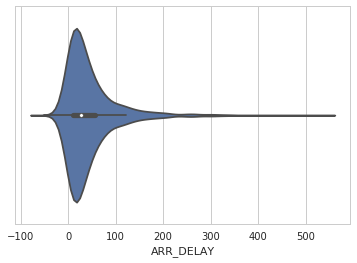

In [21]:
import seaborn as sns

sns.set_style("whitegrid")
ax = sns.violinplot(data=df, x='ARR_DELAY', inner='box', orient='h')

In [22]:
df['ontime'] = df['DEP_DELAY'] < 10
df[df['ARR_DELAY'] > 0].head()

,ARR_DELAY,DEP_DELAY,ontime
0,32.0,36.0,False
1,34.0,29.0,False
2,9.0,11.0,False
3,66.0,11.0,False
4,89.0,103.0,False


(-50, 200)

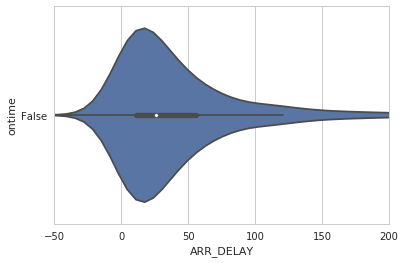

In [23]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.violinplot(data=df, x='ARR_DELAY', y='ontime', inner='box', orient='h')
ax.set_xlim(-50, 200)

(-50, 50)

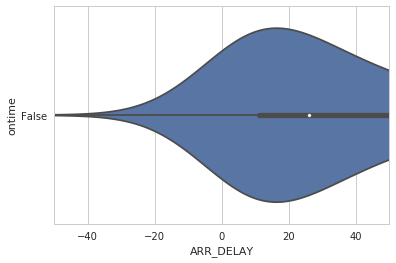

In [24]:
ax = sns.violinplot(data=df, x='ARR_DELAY', y='ontime', 
                    inner='box', orient='h', gridsize=1000)
ax.set_xlim(-50, 50)

In [25]:
query="""
SELECT
  *
FROM (
  SELECT
    DEP_DELAY,
    AVG(ARR_DELAY) AS arrival_delay,
    STDDEV(ARR_DELAY) AS stddev_arrival_delay,
    COUNT(ARR_DELAY) AS numflights
  FROM
    `flights.tzcorr`
  GROUP BY
    DEP_DELAY )
WHERE
  numflights > 370
ORDER BY
  DEP_DELAY
"""

depdelay = bq.Query(query).execute().result().to_dataframe()

depdelay[:5]

,DEP_DELAY,arrival_delay,stddev_arrival_delay,numflights
0,-23.0,-23.888646,11.432163,458
1,-22.0,-23.227488,12.590133,633
2,-21.0,-22.299781,11.558313,914
3,-20.0,-21.407821,12.066489,1432
4,-19.0,-20.430769,11.910134,1950


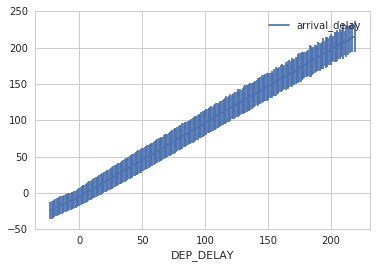

In [26]:
ax = depdelay.plot(kind='line', x='DEP_DELAY', 
              y='arrival_delay', yerr='stddev_arrival_delay')

/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


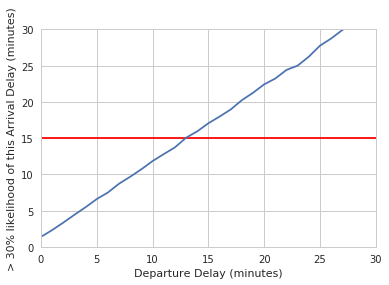

In [27]:
import matplotlib.pyplot as plt
Z_30 = 0.52
depdelay['arr_delay_30'] = (Z_30 * depdelay['stddev_arrival_delay']) \
             + depdelay['arrival_delay']
plt.axhline(y=15, color='r')
ax = plt.axes()
depdelay.plot(kind='line', x='DEP_DELAY', y='arr_delay_30',
              ax=ax, ylim=(0,30), xlim=(0,30), legend=False)
ax.set_xlabel('Departure Delay (minutes)')
ax.set_ylabel('> 30% likelihood of this Arrival Delay (minutes)');

In [29]:
query = """
SELECT
  SUM(IF(DEP_DELAY < 16
      AND arr_delay < 15, 1, 0)) AS correct_nocancel,
  SUM(IF(DEP_DELAY < 16
      AND arr_delay >= 15, 1, 0)) AS wrong_nocancel,
  SUM(IF(DEP_DELAY >= 16
      AND arr_delay < 15, 1, 0)) AS wrong_cancel,
  SUM(IF(DEP_DELAY >= 16
      AND arr_delay >= 15, 1, 0)) AS correct_cancel
FROM (
  SELECT
    DEP_DELAY,
    ARR_DELAY
  FROM
    `flights.tzcorr` f
  JOIN
    `flights.trainday` t
  ON
    f.FL_DATE = t.FL_DATE
  WHERE
    t.is_train_day = 'False' )
"""

eval = bq.Query(query).execute().result().to_dataframe()

print(eval['correct_nocancel'] /
      (eval['correct_nocancel'] + eval['wrong_nocancel']))
print(eval['correct_cancel'] / 
      (eval['correct_cancel'] + eval['wrong_cancel']))

0    0.950158
dtype: float64
0    0.804703
dtype: float64


In [30]:
!bq mk temp_dataset



Updates are available for some Cloud SDK components.  To install them,
please run:
  $ gcloud components update

Dataset 'constant-jigsaw-272415:temp_dataset' successfully created.


In [50]:
%%bigquery execute -d standard -t temp_dataset.delays

SELECT
  DEP_DELAY,
  arrival_delay,
  numflights
FROM (
  SELECT
    DEP_DELAY,
    APPROX_QUANTILES(ARR_DELAY, 101)[OFFSET(70)] AS arrival_delay,
    COUNT(ARR_DELAY) AS numflights
  FROM
    `flights.tzcorr` f
  JOIN
    `flights.trainday` t
  ON
    f.FL_DATE = t.FL_DATE
  WHERE
    t.is_train_day = 'True'
  GROUP BY
    DEP_DELAY )
WHERE
  numflights > 370
ORDER BY
  DEP_DELAY



DEP_DELAY,arrival_delay,numflights
-22.0,-19.0,439
-21.0,-19.0,660
-20.0,-17.0,1019
-19.0,-16.0,1400
-18.0,-15.0,2149
-17.0,-14.0,3085
-16.0,-13.0,4554
-15.0,-13.0,7452
-14.0,-12.0,10538
-13.0,-11.0,15689
